# Kaggle Titanic Project
## by Comando PS

## 1. Table of contents

1. Table of Contents  
2. [Introduction](#Introduction)  
3. [Business Understanding](#Business_understanding)  
    3.1. [Background](#Background)  
    3.2. [Problem description](#Problem_description)  
    3.3. [Target audience](#Target_audience)  
    3.4. [Success criteria](#Success_criteria)  
4. [Data Understanding](#Data_understanding)  
    4.1. [Structure of training and test sets](#Data_structure)  
    4.2. [Submission set](#Submission_set)  
    4.3. [Exploratory data analysis](#EDA)  
        4.3.1.  Survival  
        4.3.2.  Name
        4.3.3.  Sex  
        4.3.4.  Passenger class  
        4.3.5.  Age  
        4.3.6.  Ticket fare
        4.3.7.  Ticket
        4.3.8.  Family size
        4.3.9.  Cabin
        4.3.10. Port of embarkation
5. [Feature engineering](#Feature_engineering)    
    5.1. [Title information](#Title_information)  
    5.2. [Age](#Age_FE)  
        5.2.1. Segmentation of age bands
        5.2.2. Filling of missing age values
        5.2.3. Age band feature 
    5.3. [Family size](#Fsize_FE)  
    5.4. [Ticket occurence](#Toccurence_FE)  
        5.4.1. Lone travellers
    5.5. [Fare per person](#Farepp_FE)  
    5.6. [Port of embarkation](#Portemb_FE)  
    5.7. [Making dummies of categorical variables](#Dummies_FE)  
6. [Modeling](#Modeling)  
7. [Evaluation](#Evaluation)
8. [Conclusion](#Conclusion)


<a id='Introduction'></a>
## 2. Introduction

In this notebook we will try to complete the introductory project for kaggle, which is trying to predict if a group of passengers on board of RMS Titanic survived or not the [tragic sinking of the ship in the early hours of 15 April 1912](https://en.wikipedia.org/wiki/Sinking_of_the_RMS_Titanic). This notebook is intended to start learning ML so it will be based on some notebooks we have deemed interesting on the internet. References will be provided when needed.

![RMS Titanic][RMS]

[RMS]: https://upload.wikimedia.org/wikipedia/commons/thumb/3/3c/RMS_Titanic_sea_trials_April_2%2C_1912.jpg/637px-RMS_Titanic_sea_trials_April_2%2C_1912.jpg "RMS Titanic"

To collect insights from data we will be applying the [CRISP-DM](https://en.wikipedia.org/wiki/Cross_Industry_Standard_Process_for_Data_Mining "Wikipedia CRISP-DM page") (Cross Industry Standard Process for Data Mining) methodology.

![CRISP-DM][MET]

[MET]: https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/CRISP-DM_Process_Diagram.png/599px-CRISP-DM_Process_Diagram.png "CRISP-DM Methodology"

CRISP-DM methodology breaks the process of data mining into six phases:

1. Business understanding: Understand what we need from the data.
2. Data understanding: See how is the data formatted, what tools we need to operate with it and extract some basic insights (Exploratory Data Analysis, or EDA).
3. Data preparation: Data wrangling and feature engineering.
4. Modeling: Build a model to extract the answers needed from our data.
5. Evaluation: Use a metric to compare our results and gain some feedback from our model to further improve it.
6. Deployment: Submit our result to Kaggle.

<a id='Business_understanding'></a>
## 3. Business understanding

<a id='Background'></a>
### 3.1. Background

The sinking of RMS Titanic is one of the most infamous sinkings in contemporary history. The RMS Titanic sank in the early hours of 15 April 1912, four days into her maiden's voyage after she struck an iceberg. Of the 2224 estimated people on board approximately 1500 people died in the accident, making it one of the most lethal peacetime maritimal disasters in history.

One of the reasons for such lethality was that there was not enough lifeboats for everyone. There was some element of luck involved in the survival probability, but there is evidence that some groups of people were more fortunate than others.

<a id='Problem_description'></a>
### 3.2. Problem description

Using some data from the RMS Titanic passenger list we have to predict whether or not a given passenger had survived the sinking or not. Kaggle is asking us to build a predictive model answering the following question: “what sorts of people were more likely to survive? using passenger data (ie name, age, gender, socio-economic class, etc)". 

<a id='Target_audience'></a>
### 3.3. Target audience

This notebook will be used to learn some machine learning techniques and how to manage a successful team. The primary audience will be ourselves, but when it is finished it will be published for anyone to read. Any constructive criticism will be welcome.

<a id='Success_criteria'></a>
### 3.4. Success criteria

The main metric employed to decide our model is successful or not is the accuracy of the model (i.e. in how many passengers the outcome was correctly predicted).

<a id='Data_understanding'></a>
## 4. Data understanding

Kaggle gives us two different csv files. One will be used to train our model (called train.csv) whereas the other will be used to test the model (unsurprisingly called test.csv). Test.csv does not contain information about the survival outcome of the passenger and we need to infer it from our model.

<a id='Data_structure'></a>
### 4.1. Structure of training and test sets

Train.csv contains data from 891 different passengers of the titanic with unique ID and full name, stating if they survived or not (column 'survived'), the ticket class ('Pclass'), sex ('Sex'), number of siblings/spouses aboard ('Sibsp'), number of parents/children aboard ('parch'), ticket number ('ticket'), fare ('fare'), cabin number aboard ('cabin') and port of embarcation ('embarked').

Some notes from the documentation:

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

<a id='Submission_set'></a>
### 4.2. Submission set

The submission set shall be composed of only two columns: The passenger id from the test set and a column indicating if that passenger survived or not.

<a id='EDA'></a>
### 4.3. Exploratory Data Analysis (EDA)

First, some libraries will be imported:

In [1]:
import pandas as pd #pandas is a data analysis and manipulation tool.
import numpy as np #Package for scientific computing with Python.
import matplotlib.pyplot as plt #Python data visualization library.
import seaborn as sns #Python data visualization library based on matplotlib.
import re #regular expressions

#Matlplotlib and seaborn options:
%matplotlib inline
sns.set(style="whitegrid")

To study the full set, let's merge both datasets. In the case of the test data, the survival value will be set to NaN. The passenger ID is a unique number, different for every passenger on board. This ID will be set as the index of the dataframe.

In [2]:
df_train=pd.read_csv('data/train.csv')
df_test=pd.read_csv('data/test.csv')

survive=np.empty((418,1))
survive[:]=np.nan
df_test.insert(1,'Survived',survive)

df_full=df_train.append(df_test,ignore_index=True)
print('Dataset sizes:','\n df_train: ',df_train.shape,'\n df_test:  ',df_test.shape,'\n df_full:  ',df_full.shape)

df_full.reset_index()
df_full.set_index('PassengerId', inplace=True) #Set the passenger id as index in both the test and train sets

df_full.head()

Dataset sizes: 
 df_train:  (891, 12) 
 df_test:   (418, 12) 
 df_full:   (1309, 12)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The data type for each column is shown below.

In [3]:
df_full.dtypes

Survived    float64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In the dataset there are both numerical variables (survived, pclass...) and categorical variables (sex, embarked). Categorical variables will be transformed to something the models can use using dummy variables. This means that the categorical variables will be transformed into dichotomic categorical variables in form of a number (1 for yes, 0 for no). This will be performed before the modeling section.

Since survived is either 1 or 0, it will be transformed into an integer type (int64), as is Pclass. Name is comprised of different strings, as the Sex column, but that one will be transformed. Age is float, since there are some estimation in the ages and those are indicated with a ".5". SibSp and Parch are people counts, so they are integers. Ticket is another string. Fare is a floating point number with sometimes a lot of decimals. This is due to the fact that the currency used in 1912 in the United Kingdom did not follow base-10 numbers. More information can be found in the [pre-decimal currency Wikipedia article](https://en.wikipedia.org/wiki/%C2%A3sd). Cabin is another string, and, finally, Embarked is a categorical variable with each letter indicating where the passenger boarded the ship.

In the next cell, a brief statistical description of both categorical and numerical variables can be seen

In [4]:
df_full.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307
unique,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914
mean,0.383838,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN
std,0.486592,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


#### 4.3.1. Survival

In [5]:
df_full['Survived'].describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

The data for the survival outcome of the passengers is only known for the passengers in the training set (891 out of 1309 people). Only the 38% of passengers in the set have survived the sinking. In the following sections we will explore how survival correlates with other variables.

#### 4.3.2. Name

In [6]:
df_full['Name'].describe()

count                 1309
unique                1307
top       Kelly, Mr. James
freq                     2
Name: Name, dtype: object

All the passenger names are on the list correctly. There are two passengers with the same name.

In [7]:
df_full[df_full['Name']=='Kelly, Mr. James']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
697,0.0,3,"Kelly, Mr. James",male,44.0,0,0,363592,8.0500,NaN,S
892,NaN,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


One interesting thing we can use from this field is the title of the passenger. The title can indicate social position and sex of the bearer.

#### 4.3.3. Sex

In [8]:
df_full['Sex'].describe()

count     1309
unique       2
top       male
freq       843
Name: Sex, dtype: object

In [9]:
print("Number of females:", df_full.loc[df_full.Sex=='female'].shape[0])
print("Number of males:", df_full.loc[df_full.Sex=='male'].shape[0])

Number of females: 466
Number of males: 843


There are no missing values, with 466 females and 843 males in our dataset.

In the kaggle tutorial it is explained that gender played a key role in regards of survival probability, even creating a model that only looked at the sex of the passenger and then assigning the label survived=1 to females only, obtaining an impressive punctuation in the leaderboard. Let us explore how sex correlates with survival probability.

Percentage of women who survived: 74.2 %
Percentage of men who survived: 18.89 %


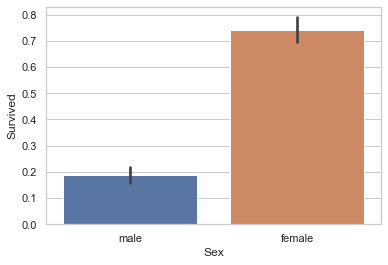

In [10]:
rate_women=100 * df_train.loc[df_train.Sex == 'female']["Survived"].sum()/df_train.loc[df_train.Sex=='female'].shape[0]
rate_men=100 * df_train.loc[df_train.Sex == 'male']["Survived"].sum()/df_train.loc[df_train.Sex=='male'].shape[0]

print("Percentage of women who survived:", round(rate_women,2),'%')
print("Percentage of men who survived:", round(rate_men,2),'%')

fig1=sns.barplot(x="Sex", y="Survived", data=df_full)

Only 18.89 % of men survived, compared with the 74.2 % of women. Is it true the "Women and children first" saying? Apparently, in 1912 it was _en vogue_.

#### 4.3.4. Passenger class

In [11]:
df_full['Pclass'].describe()

count    1309.000000
mean        2.294882
std         0.837836
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         3.000000
Name: Pclass, dtype: float64

There are no missing values in the passenger class feature. Let us see if there is some correlation between the passenger class and the survival rate.

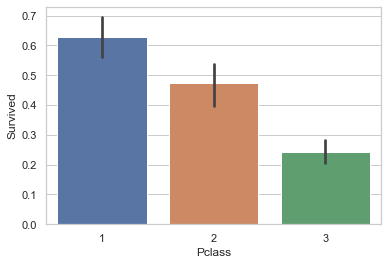

In [12]:
fig1=sns.barplot(x="Pclass", y="Survived", data=df_full)

People in first class have more survival rate than the other two ticket classes. It is possible that the social class can be used as a feature of our survival prediction model. How is distributed by sex and class?

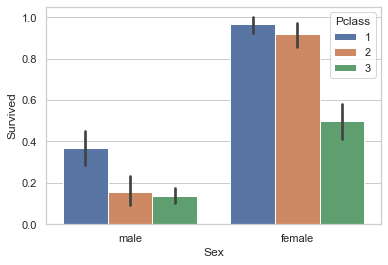

In [13]:
fig2=sns.barplot(x="Sex", y="Survived", hue="Pclass", data=df_full)

#### 4.3.5 Age

In [14]:
df_full['Age'].describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

Ther are 1046 values of 1309 possible values. This indicates that some age values are missing. Value imputation will be done in the next section (Data preparation). The average age is less than 30 years old (29.9 years), with a standard deviation of 14.4 years. The youngest recorded passenger was a little older than 2 months (0.17 years) old, whereas the oldest passenger was 80 years old. More than 75% of the passengers were less than 40 years old. 

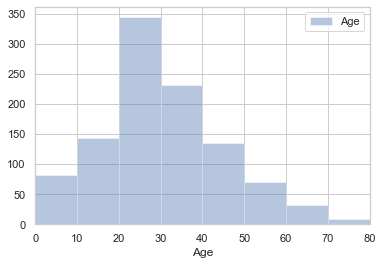

In [15]:
fig3, ax3 = plt.subplots()
sns.distplot(df_full['Age'], bins=range(0, 81, 10), ax=ax3, kde=False, label='Age')
ax3.set_xlim([0, 80])
plt.legend()
plt.show()

We can see from the age histogram that the distribution is right-skewed. A little bit more of 200 passengers are less than 20 years old, and the age mode is between 20 and 30 years old, as the mean (29.9, as we said before).

How are age and survival outcome correlated?

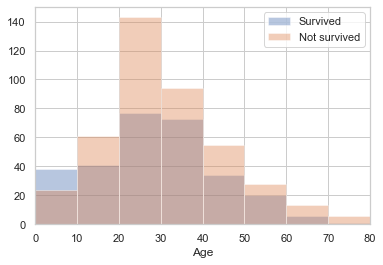

In [16]:
fig4, ax4 = plt.subplots()
labels=['Survived','Not survived']
for a,lab in zip([df_full[df_full['Survived']==1]['Age'], df_full[df_full['Survived']==0]['Age']],labels):
    sns.distplot(a, bins=range(0, 81, 10), ax=ax4, kde=False, label=lab)
ax4.set_xlim([0, 80])
plt.legend()
plt.show()

This histogram shows us how the survival probability correlates with age. We can see that is more probable to survive for people from 0 to 10 years old. In the other groups of age it is more probable to not survive than leaving the sinking boat alive. This is specially significant in the 20-40 year brackets.

Text(0.5, 1.0, 'Male')

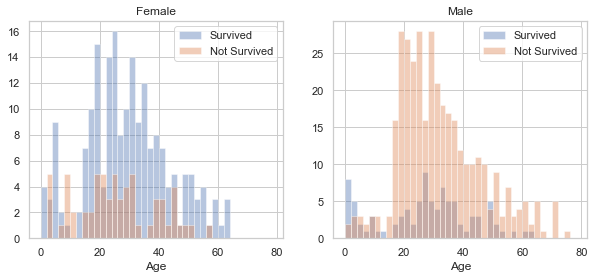

In [17]:
fig5, ax5= plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = df_full[df_full['Sex']=='female']
men = df_full[df_full['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=range(0, int(np.ceil(df_full['Age'].max())), 2), label = 'Survived', ax = ax5[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=range(0, int(np.ceil(df_full['Age'].max())), 2), label = 'Not Survived', ax = ax5[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=range(0, int(np.ceil(df_full['Age'].max())), 2), label = 'Survived', ax = ax5[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=range(0, int(np.ceil(df_full['Age'].max())), 2), label = 'Not Survived', ax = ax5[1], kde = False)
ax.legend()
ax.set_title('Male')

For both sexes, the bulk of people surviving (and dying) concentrates in the ages between 20 and 40 years old. We have discussed before that most of the Titanic population was less than 40 years old. This can be seen clearly in the graphs above.

Young males tend to survive more than their adult counterparts. Both survival distributions are right skewed. It is possible that age plays a significant role in survival probability. It can be seen that survival probabilities for elderly people are not very good, even though there are some elderly males surviving in the 60-80 age bracket.

#### 4.3.6. Ticket Fare

In [18]:
df_full['Fare'].describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

There is only one value missing for the fare in the dataset. Our main hypothesis in this notebook is that social class is an indicator of survival in the Titanic passenger list. That is, if you are rich, you are more likely to survive, as we have seen in the passenger class section. Ticket fare is directly correlated with this, as first class tickets are more expensive than third class tickets.

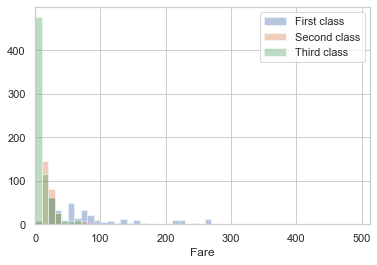

In [19]:
fig6, ax6 = plt.subplots()
labels = ['First class','Second class','Third class']
pclass = [1,2,3]

for pcls,lab in zip(pclass,labels):
    sns.distplot(df_full[df_full['Pclass']==pcls].Fare, bins=range(0, int(np.ceil(df_full['Fare'].max())), 10), ax=ax6, kde=False, label=lab)

ax6.set_xlim([0, np.ceil(df_full['Fare'].max())])
plt.legend()
plt.show()

The results in this histogram are a bit puzzling. There are people in fist class with a fare equal to 0, people in third class paying more than people in second class, and people in second class paying more than some first class tickets! The reason is that these are not prices per person. Groups of people bought tickets in bulk, and that is why some third class tickets are more expensive than second class tickets. A new feature will be engineering taking into account the ticket ocurrences to calculate the average ticket price per person belonging to that ticket.

The pricing of the Titanic tickets is a complicated matter. It seems that the ticket also includes the rail ticket to arrive to port, and prices for children under 12 and babies are reduced. Since we do not know the individual information, the engineered variable will show the average ticket fare per person on the group. All this will be done in the Data Engineering section.

Regarding the zero value tickets, a search of the names in [Encyclopedia Titanica](https://www.encyclopedia-titanica.org/) indicates that the people that did not pay anything for their ticket are employees from the White Star Line company, the shipyard or affiliated companies. Even though at first sight it seems like a data input error, we can see that this is not the case.

In [20]:
df_full[df_full['Fare']==0]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
180,0.0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
264,0.0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
272,1.0,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
278,0.0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
303,0.0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
414,0.0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
467,0.0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
482,0.0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
598,0.0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S


In the following graph we can see the survival probability as a function of ticket fare.

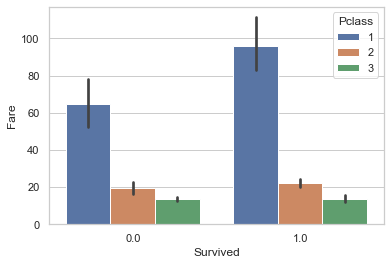

In [21]:
fig7=sns.barplot(x="Survived", y="Fare", hue="Pclass", data=df_full)

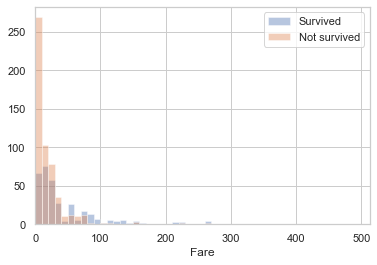

In [22]:
fig8, ax8 = plt.subplots()
labels=['Survived','Not survived']
for a,lab in zip([df_full[df_full['Survived']==1]['Fare'], df_full[df_full['Survived']==0]['Fare']],labels):
    sns.distplot(a, bins=range(0, int(np.ceil(df_full['Fare'].max())), 10), ax=ax8, kde=False, label=lab)
ax8.set_xlim([0, int(np.ceil(df_full['Fare'].max()))])
plt.legend()
plt.show()

It is possible that fare is correlated with survival probability. Alas, fare is also highly correlated with passenger class. So if the passenger class is correlated with survival probability, fare will also be. We need to study the individual fares of the passengers to come to a conclussion.

#### 4.3.7. Family Size

In [23]:
df_full[['Parch','SibSp']].describe()

,Parch,SibSp
count,1309.000000,1309.000000
mean,0.385027,0.498854
std,0.865560,1.041658
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,1.000000
max,9.000000,8.000000


All the entries in the dataset have that information available. It is imortant to remember that 'SibSp' refers to the number of siblings or spouses aboard, whereas 'Parch' designates the number of parents or childrens in the ship.

We can also study how the survival probability correlates with having family members aboard the titanic. The survival distribution as a function of the variables Sibsp and Parch is as follows

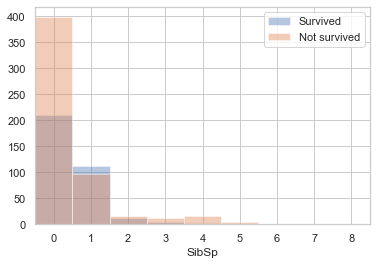

In [24]:
fig9, ax9 = plt.subplots()

labels = ['Survived','Not survived']

for a,lab in zip([df_full[df_full['Survived']==1]['SibSp'], df_full[df_full['Survived']==0]['SibSp']],labels):
    sns.distplot(a, bins=np.arange(-0.5, int(np.ceil(df_full['SibSp'].max()))+0.5, 1), ax=ax9, kde=False, label=lab)

ax9.set_xlim([-0.5, 8.5])
plt.legend()
plt.show()

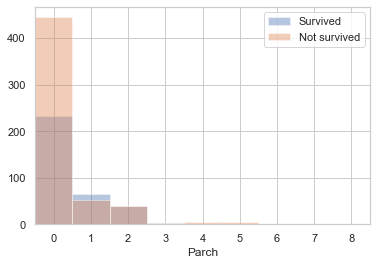

In [25]:
fig10, ax10 = plt.subplots()

labels = ['Survived','Not survived']

for a,lab in zip([df_full[df_full['Survived']==1]['Parch'], df_full[df_full['Survived']==0]['Parch']],labels):
    sns.distplot(a, bins=np.arange(-0.5, int(np.ceil(df_full['Parch'].max()))+0.5, 1), ax=ax10, kde=False, label=lab)

ax10.set_xlim([-0.5, 8.5])
plt.legend()
plt.show()

Those two plots tell us than people travelling alone are more likely to not survive the accident. On the other hand, it seems that people travelling together had an easier time to survive, as can be seen in SibSp equals 1 and 2 and Parch equals 1.

#### 4.3.8. Ticket

In [26]:
df_full['Ticket'].describe()

count         1309
unique         929
top       CA. 2343
freq            11
Name: Ticket, dtype: object

All the entries in the dataset have a ticket number. From the documentation we can see that in the case of children travelling without family there is a nanny with him/her. That means that the nanny will not appear on the family number, but maybe it will appear under the same ticket.

In [27]:
df_full.loc[778]

Survived                                1
Pclass                                  3
Name        Emanuel, Miss. Virginia Ethel
Sex                                female
Age                                     5
SibSp                                   0
Parch                                   0
Ticket                             364516
Fare                               12.475
Cabin                                 NaN
Embarked                                S
Name: 778, dtype: object

Let us take the case of Miss. Virginia Ethel Emanuel, a girl of age 5 with SibSp and Parch equal to 0. If we perform a search using the ticket number we will find the following:

In [28]:
df_full[df_full['Ticket']=='364516']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
80,1.0,3,"Dowdell, Miss. Elizabeth",female,30.0,0,0,364516,12.475,NaN,S
778,1.0,3,"Emanuel, Miss. Virginia Ethel",female,5.0,0,0,364516,12.475,NaN,S


This little girl was not really travelling alone. She was in the company of Miss. Elizabeth Dowdell, who was nursing her during her voyage to her grandparents' house in New Jersey. Ticket feature could be used to discern in a more precise way who were the lonely travellers aboard.

This feature will be also important to calculate the average ticket fare per person, by counting the people with the same ticket and dividing the fare by this number.

#### 4.3.9. Cabin

In [29]:
df_full['Cabin'].describe()

count             295
unique            186
top       C23 C25 C27
freq                6
Name: Cabin, dtype: object

Since there are so missing values, this feature will not be used to obtain any insight.

#### 4.3.10. Port of embarkation

In [30]:
df_full['Embarked'].describe()

count     1307
unique       3
top          S
freq       914
Name: Embarked, dtype: object

There are only two missing values for this feature. Let us see how it correlates with survival.

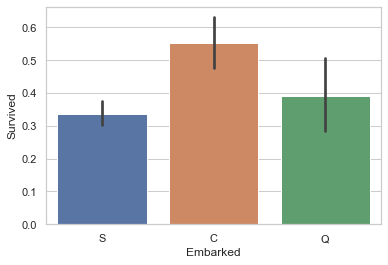

In [31]:
fig11=sns.barplot(x="Embarked",y="Survived",data=df_full)

In [32]:
embarked_corr = (df_full[['Survived', 'Embarked', 'Pclass', 'Sex']].groupby(['Embarked', 'Pclass', 'Sex']).agg(['count', 'sum', 'mean']))
embarked_corr.columns = embarked_corr.columns.droplevel(0)
embarked_corr.columns = ['Total', 'Survived', 'Rate']
embarked_corr

Total  Survived      Rate
Embarked Pclass Sex                              
C        1      female     43      42.0  0.976744
                male       42      17.0  0.404762
         2      female      7       7.0  1.000000
                male       10       2.0  0.200000
         3      female     23      15.0  0.652174
                male       43      10.0  0.232558
Q        1      female      1       1.0  1.000000
                male        1       0.0  0.000000
         2      female      2       2.0  1.000000
                male        1       0.0  0.000000
         3      female     33      24.0  0.727273
                male       39       3.0  0.076923
S        1      female     48      46.0  0.958333
                male       79      28.0  0.354430
         2      female     67      61.0  0.910448
                male       97      15.0  0.154639
         3      female     88      33.0  0.375000
                male      265      34.0  0.128302

It seems that people embarked in Cherbourg tend to survive more. Southampton had more third class passengers embarked, so it is expected that the survival probability goes down (as Pclass and survival probability are correlated). 

But if we segment the population into port of embarking, class and sex we can see that the ratios are consistent with the ones obtained before in terms of sex and class. So the port of embarking does not correlate with survival.

#### Conclusion

We have studied the different variables of the titanic dataset. We have obtained some insight from the exploratory analysis of the features and we have come to the conclusion that there are some interesting candidates to be used as features on our model. Those features are passenger title (the sex is implicit in the title), passenger class, fare per person (to distiguish classes inside the classes), age and whether or not the passenger is travelling alone or without family.

<a id='Feature_engineering'></a>
## 5. Feature Engineering

In this section, we will fill missing values, transform existing features and add new ones to improve our model's predictive power. First of all, we must know how many missing values do we have and where they are, so we'll start by performing the count in the full dataset.

In [33]:
print(f'The full dataset has {df_full.shape[0]} entries\n')
df_full.isnull().sum()

The full dataset has 1309 entries



Survived     418
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

Following the order of the table we have:

- Survided: 418 missing values. We don't need to care about them as they belong to the test partition of the full dataset, *i. e.*, they are the values we will predict in the Modeling section.

- Age: 263 missing values that we will need to fill. We'll discuss how shortly.

- Fare: 1 missing value. 

- Cabin: 1014 missing values. As we state previously, we will simply drop this feature.

- Embarked: 2 missing values.


<a id='Title_information'></a>
### 5.1 Title information

We can create a new feature, Title, from the Name information. This feature summarizes gender and age information in one feature and it will be helpful when predicting survival/deceasing.

In [34]:
def get_title(name):
	"""If the title exists, extracts and return it."""

	title_search = re.search(' ([A-Za-z]+)\.', name)
	if title_search:
		return title_search.group(1)
	return ""

We now create the new column with Title information and print its unique values.

In [35]:
df_full['Title'] = df_full['Name'].apply(get_title)

df_full.Title.unique().tolist()

['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Don',
 'Rev',
 'Dr',
 'Mme',
 'Ms',
 'Major',
 'Lady',
 'Sir',
 'Mlle',
 'Col',
 'Capt',
 'Countess',
 'Jonkheer',
 'Dona']

The output shows plenty of Titles, so we better reassign some of them by hand to improve predictive power.

In [36]:
df_full['Title'] = df_full['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Major', 'Rev', 'Sir', 'Jonkheer'], 'Noble')   
df_full['Title'] = df_full['Title'].replace('Don', 'Mr')
df_full['Title'] = df_full['Title'].replace(['Mlle', 'Ms'], 'Miss')
df_full['Title'] = df_full['Title'].replace(['Mme', 'Dona'], 'Mrs')

# Dr is a special case as we have both men and women
male_dr_filter = (df_full.Title == 'Dr') & (df_full.Sex == 'male')
female_dr_filter = (df_full.Title == 'Dr') & (df_full.Sex == 'female')
df_full.loc[male_dr_filter, ['Title']] = 'Mr'
df_full.loc[female_dr_filter, ['Title']] = 'Mrs'

pd.crosstab(df_full['Title'], df_full['Sex'])

Sex,female,male
Title,,
Master,0,61
Miss,264,0
Mr,0,765
Mrs,200,0
Noble,2,17


As we can see, all Titles but one are exclusive, which is a good sign.

<a id='Age_FE'></a>
### 5.2 Age

#### 5.2.1 Segmentation of age bands

Before filling age missing values we want to segment age groups by using a KMeans clustering algorithm. We first select the relevant data for this analysis.

In [37]:
age_data = df_full[['Age', 'Survived']].dropna()

First of all, we'll use the Elbow Method to find the optimal number of clusters.

In [38]:
from sklearn.cluster import KMeans

sum_squared_distances = []

k_range = range(1, 11)
for k in k_range:
    km = KMeans(n_clusters = k)
    km = km.fit(age_data)
	# Computing squared distances of samples to their closest cluster center
    sum_squared_distances.append(km.inertia_)

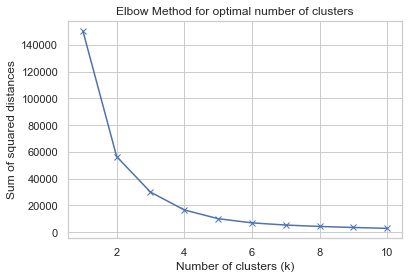

In [39]:
plt.plot(k_range, sum_squared_distances, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method for optimal number of clusters')
plt.show()

We can now perform a KMeans with k = 4 as suggested by the Elbow Method. We'll also display the decission boundaries.

In [40]:
k_elbow = 4
random_state = 4

kmeans = KMeans(n_clusters = k_elbow, random_state = random_state)
kmeans.fit(age_data)

age_data['Label'] = kmeans.labels_

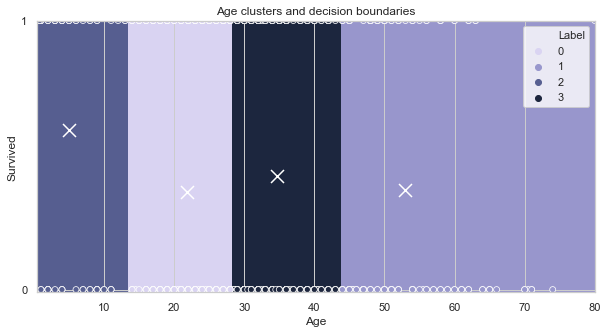

In [41]:
# Plot the decision boundary
# See http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html
plt.figure(figsize=(10,5))
h = 0.01
x_min, x_max = age_data['Age'].min() - h, age_data['Age'].max() + h
y_min, y_max = age_data['Survived'].min() - h, age_data['Survived'].max() + h
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the age cluster for each point in a mesh
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
cmap = sns.cubehelix_palette(start=2.8, rot=.1, as_cmap=True)
Z = Z.reshape(xx.shape)
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=cmap, aspect='auto')

# Plot the ages
sns.scatterplot(x='Age', y='Survived', hue='Label', data=age_data, palette=cmap)

# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w')
plt.yticks([0, 1])
plt.title("Age clusters and decision boundaries")
plt.show()

Finally, we obtain the age bands to create the new AgeBand feature.

In [42]:
age_bands = age_data.groupby('Label')['Age'].min().astype(int).sort_values().tolist()
age_bands.append(np.inf) # Adding an upper boundary

print('Age boundaries obtained after KMeans clustering:')
age_bands

Age boundaries obtained after KMeans clustering:


[0, 14, 28, 44, inf]

#### 5.2.2 Filling of missing age values

We can fill the missing values now. To fill the data, we will calculate the median as a function of Title and Pclass using only the training data [:891].

In [43]:
ages_table = df_full[:891].groupby(['Title','Pclass'])['Age'].median()
ages_table

Title   Pclass
Master  1          4.0
        2          1.0
        3          4.0
Miss    1         30.0
        2         24.0
        3         18.0
Mr      1         40.0
        2         31.0
        3         26.0
Mrs     1         41.5
        2         32.0
        3         31.0
Noble   1         49.0
        2         46.5
Name: Age, dtype: float64

We will now replace NaN with zeros and then fill them with the median for its Title/Pclass.

In [44]:
df_full['Age'] = df_full['Age'].fillna(0)

for ind, row in df_full[df_full['Age'] == 0].iterrows():
    df_full.loc[ind, 'Age'] = ages_table[row.Title][row.Pclass]

In [45]:
df_full.loc[(df_full.Age == 0)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,


#### 5.2.3 AgeBand feature

We create a new column with each passengers AgeBand, and print the survival rate for each of them.

In [46]:
df_full['AgeBand'] = pd.cut(df_full['Age'], age_bands)

df_full.groupby('AgeBand')['Survived'].mean()

AgeBand
(0.0, 14.0]     0.580247
(14.0, 28.0]    0.319512
(28.0, 44.0]    0.424561
(44.0, inf]     0.373913
Name: Survived, dtype: float64

<a id='Fsize_FE'></a>
### 5.3 Family Size

In [47]:
df_full['FamilySize'] = df_full['SibSp'] + df_full['Parch'] + 1

<a id='Toccurence_FE'></a>
### 5.4 Ticket Occurrence

In [48]:
df_full['TicketOccurr'] = df_full.groupby('Ticket')['Ticket'].transform('size')

#### 5.4.1 Lone travellers

We'll define it from Ticket Occurrence instead of Family Size.

In [49]:
df_full['IsAlone'] = df_full['TicketOccurr'].apply(lambda x: 1 if x == 1 else 0)

<a id='Farepp_FE'></a>
### 5.5 Fare per person

In [50]:
df_full['FarePerPerson'] = df_full['Fare'] / df_full['TicketOccurr']

As we did with missing ages, we'll fill the FarePerPerson missing values by using the median of the Pclass.

In [51]:
fares_table = df_full[:891].groupby('Pclass')['FarePerPerson'].median()

print('Median fare by class')
fares_table

Median fare by class


Pclass
1    30.000000
2    12.342367
3     7.750000
Name: FarePerPerson, dtype: float64

In [52]:
for ind, row in df_full[df_full['FarePerPerson'].isnull()].iterrows():
	df_full.loc[ind, 'FarePerPerson'] = fares_table[row.Pclass]

In [53]:
df_full[df_full[['FarePerPerson']].isnull().any(axis=1)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand,FamilySize,TicketOccurr,IsAlone,FarePerPerson
PassengerId,,,,,,,,,,,,,,,,,


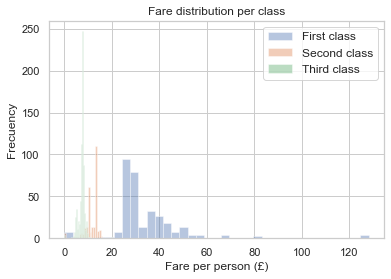

In [54]:
for cls, label in zip([1, 2, 3], ['First class', 'Second class', 'Third class']):
    mask = df_full['Pclass'] == cls
    df = df_full[mask]
    
    sns.distplot(df['FarePerPerson'],  kde = False, label = label)

# Plot formatting
plt.legend(prop = {'size': 12})
plt.title('Fare distribution per class')
plt.xlabel('Fare per person (£)')
plt.ylabel('Frecuency')
#plt.savefig('Fares.png', dpi = 300)
plt.show()

<a id='Portemb_FE'></a>
### 5.6  Port of Embarkation

We'll fill the Embarked missing values we can use the MODE, we can take a random sample or we can study if there is any correlation between Embarked and other features such as FarePerPerson, Title or Pclass.

In [55]:
df_ports = df_full[:891].groupby(['Embarked', 'Pclass'])['Pclass'].count()

print('Number of passengers for each port/class')
df_ports

Number of passengers for each port/class


Embarked  Pclass
C         1          85
          2          17
          3          66
Q         1           2
          2           3
          3          72
S         1         127
          2         164
          3         353
Name: Pclass, dtype: int64

What is the proportion of passengers of each class that have embarked at each port?

In [56]:
df_ports_prop = df_ports / df_full[:891].groupby(['Embarked'])['Pclass'].count()

print('Proportion of passengers for each port/class')
df_ports_prop

Proportion of passengers for each port/class


Embarked  Pclass
C         1         0.505952
          2         0.101190
          3         0.392857
Q         1         0.025974
          2         0.038961
          3         0.935065
S         1         0.197205
          2         0.254658
          3         0.548137
Name: Pclass, dtype: float64

We decided (for now) to fill the missing values by randomly sampling the Embarked column.

In [57]:
num_nan = df_full[df_full[['Embarked']].isnull().any(axis=1)].index
port_samp = list(df_train['Embarked'].sample(len(num_nan), replace = True))

for i in range(len(num_nan)):
    df_full.loc[num_nan[i], 'Embarked'] = port_samp[i]

We count missing values again after imputation.

In [58]:
print(f'The full dataset has {df_full.shape[0]} entries')
df_full.isnull().sum()

The full dataset has 1309 entries


Survived          418
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                1
Cabin            1014
Embarked            0
Title               0
AgeBand             0
FamilySize          0
TicketOccurr        0
IsAlone             0
FarePerPerson       0
dtype: int64

It can be seen that all missing values have been filled. The Fare column still has a missing value, but we won't use it in the following section, since it is corrected in "fare per person".

<a id='Dummies_FE'></a>
### 5.7 Making dummies of categorical variables

In [59]:
columns = ['AgeBand', 'Pclass', 'Title', 'Embarked']
df_full = pd.get_dummies(df_full, columns = columns)

df_full['Sex'] = df_full['Sex'].map({'male':1,'female':0})

df_full.head()

,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,...,Pclass_2,Pclass_3,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Noble,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0.0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,...,0,1,0,0,1,0,0,0,0,1
2,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,2,...,0,0,0,0,0,1,0,1,0,0
3,1.0,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,...,0,1,0,1,0,0,0,0,0,1
4,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,...,0,0,0,0,0,1,0,0,0,1
5,0.0,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,1,...,0,1,0,0,1,0,0,0,0,1


<a id='Modeling'></a>
## 6. Modeling

In this section, we will try to predict passenger's survival outcome based on the features that we transformed/created in the previous section. 

### 6.1 Feature selection

First, we will obtain the correlation matrix to have visual idea of the most important features.  

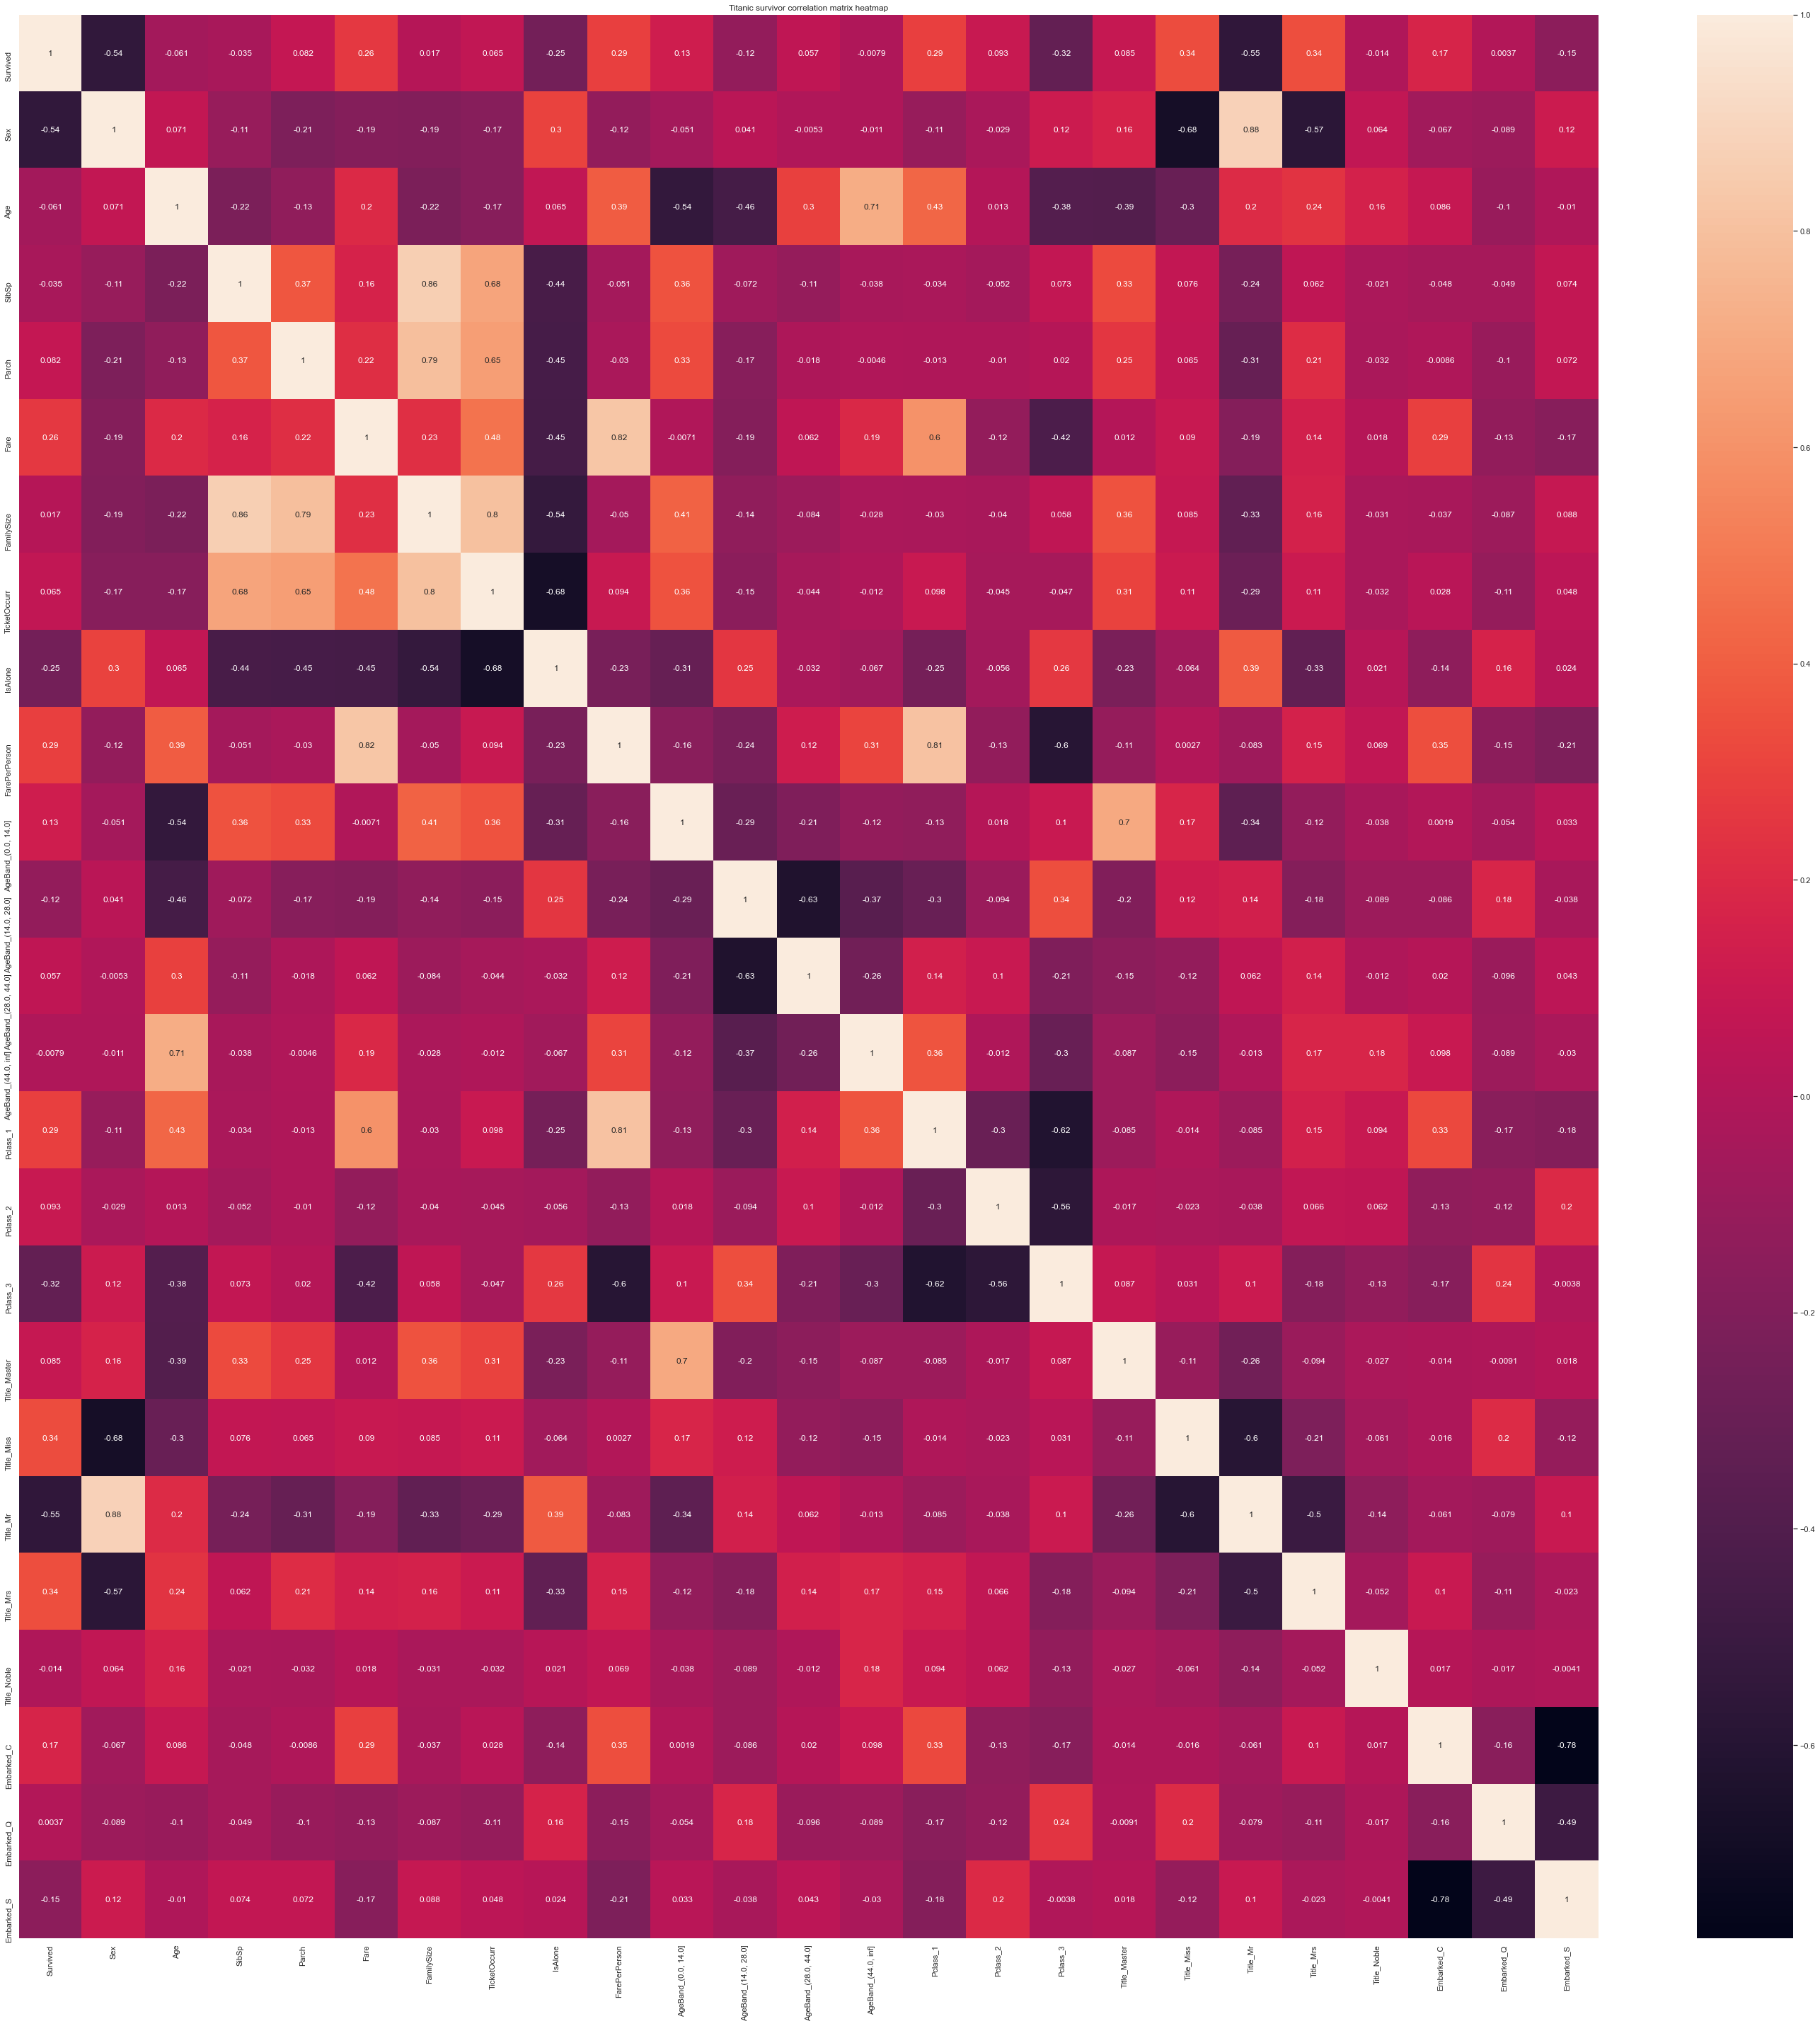

In [60]:
corr_full = df_full.corr()

plt.figure(figsize = (50,50))
sns.heatmap(corr_full, annot = True)
plt.title("Titanic survivor correlation matrix heatmap")
plt.show()

Now we can select the features that will be used to train our models.

In [61]:
df_full.columns

Index(['Survived', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'FamilySize', 'TicketOccurr', 'IsAlone', 'FarePerPerson',
       'AgeBand_(0.0, 14.0]', 'AgeBand_(14.0, 28.0]', 'AgeBand_(28.0, 44.0]',
       'AgeBand_(44.0, inf]', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Noble',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [62]:
#features = Sex	IsAlone	FarePerPersonEmbarked_CEmbarked_QEmbarked_SPclass_1Pclass_2Pclass_3Title_MasterTitle_MissTitle_MrTitle_MrsTitle_NobleAgeBand_(0.0, 13.16]AgeBand_(13.16, 27.67]AgeBand_(27.67, 43.52]AgeBand_(43.52, inf]
data = df_full.drop(['Survived','Name','Age','SibSp','Parch','Ticket','Fare','Cabin','FamilySize','TicketOccurr','FarePerPerson'],axis=1)

data.head()

,Sex,IsAlone,"AgeBand_(0.0, 14.0]","AgeBand_(14.0, 28.0]","AgeBand_(28.0, 44.0]","AgeBand_(44.0, inf]",Pclass_1,Pclass_2,Pclass_3,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Noble,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,
1,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1
2,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0
3,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1
4,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1
5,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1


Now, we can split the data into:

- train: it will be the original train set but with our new features.
- test: original test set but with the transformed features.
- target: labels for the training examples.

In [63]:
train = data[0:891]        # "original" train set containing transformed/selected features
test = data[891:]          # "original" test set containing transformed/selected features 
target = df_train.Survived[0:891] # being df_train the original train data we imported in the beginning 

print(f'''Checking data frame sizes...\n
-Train dataset has {train.shape[0]} entries and {train.shape[1]} features
-Test dataset has {test.shape[0]} entries and {test.shape[1]} features
-Target dataset has { target.shape[0]} entries''')

Checking data frame sizes...

-Train dataset has 891 entries and 17 features
-Test dataset has 418 entries and 17 features
-Target dataset has 891 entries


### 6.2 Preprocessing

In this section, we are going to standardize our data. Besides, we define X and y for convenience (they are common names for the feature/target matrices).

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = StandardScaler().fit_transform(train)
y = target

#Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

print(f'''Checking train and test split sizes...
Train set: X_train -> {X_train.shape}, y_train -> {y_train.shape}
Test set: X_test -> {X_test.shape}, y_test -> {y_test.shape}''')

Checking train and test split sizes...
Train set: X_train -> (712, 17), y_train -> (712,)
Test set: X_test -> (179, 17), y_test -> (179,)


### 6.3 Model selection

In this section, we will run several models and check their performance to select the best five. Our goal is to obtain the final predictions by using a Stacking approach.  

In [65]:
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier

from sklearn.model_selection import cross_val_score

# Set random state and number of estimators for tree based models
random_state = 4
n_estimators = 100

models = [LogisticRegression(
             random_state = random_state),
          Perceptron(
              random_state = random_state), 
          SGDClassifier(
              random_state = random_state), 
          SVC(
              random_state = random_state), 
          KNeighborsClassifier(
              ), 
          GaussianNB(
              ),
          DecisionTreeClassifier(
              random_state = random_state), 
          RandomForestClassifier(
              random_state = random_state,
              n_estimators = n_estimators),
          ExtraTreesClassifier(
              random_state = random_state,
              n_estimators = n_estimators),
          AdaBoostClassifier(
              random_state = random_state,
              n_estimators = n_estimators),
          GradientBoostingClassifier(
              random_state = random_state, 
              n_estimators = n_estimators)
         ]

# Lists to store the results
model_name = []
acc_test = []
acc_train = []
cv_scores = []

# Number of folds for the cross validation
cv = 5

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_name.append(model.__class__.__name__)
    acc_test.append(model.score(X_test, y_test))
    acc_train.append(model.score(X_train, y_train))
    # We use X and y here because cross_val_score needs all the data to perform the splits by itself
    cv_scores.append(cross_val_score(model, X, y, cv = cv))

results = pd.DataFrame({
    'Model': model_name,
    'CVScore' : cv_scores,
    'TestScore': acc_test,
    'TrainScore': acc_train
    })

# We need to obtain the mean value for the CVScore column
results.insert(1, 'CVMeanScore', np.mean(results['CVScore'].tolist(), axis = 1))
results.drop(['CVScore'], axis = 1, inplace = True)

print('Cross validation results'.upper())
display(results)

# Finally, we select the top 5 algorithms based on the CVMeanScore
results_top5 = results.sort_values(by = 'CVMeanScore', ascending = False, ignore_index = True).head()

print('Top 5 algorithms'.upper())
display(results_top5)

CROSS VALIDATION RESULTS


,Model,CVMeanScore,TestScore,TrainScore
0,LogisticRegression,0.793472,0.849162,0.804775
1,Perceptron,0.682437,0.787709,0.714888
2,SGDClassifier,0.760875,0.776536,0.685393
3,SVC,0.817074,0.843575,0.831461
4,KNeighborsClassifier,0.810332,0.837989,0.835674
5,GaussianNB,0.784521,0.815642,0.783708
6,DecisionTreeClassifier,0.808060,0.843575,0.849719
7,RandomForestClassifier,0.801331,0.837989,0.849719
8,ExtraTreesClassifier,0.806936,0.843575,0.849719
9,AdaBoostClassifier,0.793491,0.843575,0.786517


TOP 5 ALGORITHMS


,Model,CVMeanScore,TestScore,TrainScore
0,GradientBoostingClassifier,0.817080,0.843575,0.828652
1,SVC,0.817074,0.843575,0.831461
2,KNeighborsClassifier,0.810332,0.837989,0.835674
3,DecisionTreeClassifier,0.808060,0.843575,0.849719
4,ExtraTreesClassifier,0.806936,0.843575,0.849719


# Test
https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python/notebook

### Selecting the best ML Algorithm

In [66]:
from sklearn.model_selection import KFold

# Some useful parameters which will come in handy later on
ntrain = train.shape[0]
ntest = test.shape[0]
SEED = 2 # for reproducibility
NFOLDS = 5 # set folds for out-of-fold prediction
kf = KFold(n_splits= NFOLDS, shuffle= True, random_state=SEED)

# Class to extend the Sklearn classifier
class SklearnHelper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        print(self.clf.fit(x,y).feature_importances_)
        
    
    
    
# Class to extend XGboost classifer

In [67]:
def get_oof(clf, x_train, y_train, x_test):
    oof_train = np.zeros((ntrain,)) #array vacio de longitud igual al numero de el de train en dataset
    oof_test = np.zeros((ntest,)) #lo mismo con el test
    oof_test_skf = np.empty((NFOLDS, ntest)) #tantas filas como KFolds y columnas igual a elemetos de test en dataset

    for train_index, test_index in kf.split(x_train,y_train): #i es el iterable de kfolds, train index y test index los valores que kfolds asigna a los elementos del train set
        x_tr = x_train[train_index] #train del train set (crossvalidation)
        y_tr = y_train[train_index] #etiquetas del train cross validation
        x_te = x_train[test_index] # test del train set (crossvalidation)

        clf.train(x_tr, y_tr) #entrena modelo con train cv

        oof_train[test_index] = clf.predict(x_te) #predice valores de test crossvalidation
        oof_test_skf[i, :] = clf.predict(x_test) #valores predichos del testset de verdad

    oof_test[:] = oof_test_skf.mean(axis=0) #media en columnas de la prediccion de todos los entrenamientos del modelo con kfolds
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1) #devuelve los valores de test crossvalidation y del test de verdad

In [68]:
gbc_params={'random_state':random_state, 
            'n_estimators':n_estimators}

svc_params={'random_state':random_state}

ada_params = {
    'n_estimators': 500,
    'learning_rate' : 0.75
}

rf_params={'random_state':random_state,
           'n_estimators':n_estimators}
             
et_params={'random_state':random_state,
           'n_estimators': n_estimators}


In [69]:
gbc = SklearnHelper(clf=GradientBoostingClassifier, seed=SEED, params=gbc_params)
svc = SklearnHelper(clf=SVC, seed=SEED, params=svc_params)
ada = SklearnHelper(clf=AdaBoostClassifier, seed=SEED, params=ada_params)
rf = SklearnHelper(clf=RandomForestClassifier, seed=SEED, params=rf_params)
et = SklearnHelper(clf=ExtraTreesClassifier, seed=SEED, params=et_params)

In [70]:
# pandas originales: train, target y test
# X e y es el training set preprocesado
# X

y_train = target.ravel()

x_train = train.values # Creates an array of the train data
x_test = test.values # Creats an array of the test data

In [71]:
# Create our OOF train and test predictions. These base results will be used as new features
gbc_oof_train, gbc_oof_test = get_oof(gbc, x_train, y_train, x_test) # Extra Trees
svc_oof_train, svc_oof_test = get_oof(svc,x_train, y_train, x_test) # Random Forest
ada_oof_train, ada_oof_test = get_oof(ada, x_train, y_train, x_test) # AdaBoost 
rf_oof_train, rf_oof_test = get_oof(rf,x_train, y_train, x_test) # Gradient Boost
et_oof_train, et_oof_test = get_oof(et,x_train, y_train, x_test) # Support Vector Classifier

print("Training is complete")

Training is complete


In [72]:
print(NFOLDS)

5


In [74]:
gbc_feature = gbc.feature_importances(x_train,y_train)
ada_feature = ada.feature_importances(x_train,y_train)
rf_feature = rf.feature_importances(x_train,y_train)
et_feature = et.feature_importances(x_train,y_train)

[0.11412918 0.01466332 0.01127922 0.00466591 0.00290324 0.01312633
 0.05448549 0.00161408 0.15272781 0.01329238 0.00176182 0.51398389
 0.00354877 0.04954719 0.00520762 0.00827051 0.03479324]
[0.334 0.016 0.008 0.004 0.002 0.01  0.014 0.    0.006 0.044 0.272 0.052
 0.218 0.006 0.006 0.006 0.002]
[0.19009979 0.05563427 0.02212875 0.02905154 0.01991817 0.01748812
 0.06886745 0.03783381 0.10955764 0.01366012 0.0586721  0.2160505
 0.07545362 0.01076838 0.02687992 0.01738933 0.03054649]
[0.17511675 0.05097241 0.02142491 0.02374822 0.01438698 0.01417132
 0.0713598  0.04011754 0.09958976 0.01356848 0.05974264 0.25983311
 0.07086959 0.01414084 0.02745693 0.01590674 0.02759398]


In [75]:
gbc_feature=[0.11329864, 0.01132495, 0.01272011, 0.00823823, 0.00441233, 0.01471281,
             0.05439059, 0.00187878, 0.15303081, 0.01330474, 0.00112209, 0.51160441,
             0.00213944, 0.04860876, 0.00686277, 0.00721306, 0.0351375]
ada_feature=[0.332, 0.016, 0.006, 0.004, 0.002, 0.01,  0.014, 0.0,   0.006, 0.048, 0.264, 0.064,
             0.21,  0.01,  0.006, 0.006, 0.002]
rt_feature=[0.18969749, 0.05567656, 0.02153451, 0.02906707, 0.01997672, 0.01707264,
            0.06894833, 0.03834659, 0.10919924, 0.01306756, 0.05787117, 0.21685931,
            0.0760907,  0.01081022, 0.02660153, 0.0179094,  0.03127098]
et_feature =[0.17484683, 0.05056814, 0.02115633, 0.02434329, 0.01449115, 0.01399782,
             0.07090722, 0.04013149, 0.09906829, 0.01364253, 0.06034052, 0.25971718,
             0.07086909, 0.01459243, 0.02823044, 0.01628112, 0.02681614]


In [76]:
cols = train.columns.values
# Create a dataframe with features
feature_dataframe = pd.DataFrame({'features': cols,
                                  'Gradient Boost feature importances': gbc_feature,
                                  'AdaBoost feature importances': ada_feature,
                                  'Random Trees feature importances': rt_feature,
                                  'Extra Trees  feature importances': et_feature
                                 })

In [77]:
feature_dataframe.head()

,features,Gradient Boost feature importances,AdaBoost feature importances,Random Trees feature importances,Extra Trees feature importances
0,Sex,0.113299,0.332,0.189697,0.174847
1,IsAlone,0.011325,0.016,0.055677,0.050568
2,"AgeBand_(0.0, 14.0]",0.012720,0.006,0.021535,0.021156
3,"AgeBand_(14.0, 28.0]",0.008238,0.004,0.029067,0.024343
4,"AgeBand_(28.0, 44.0]",0.004412,0.002,0.019977,0.014491


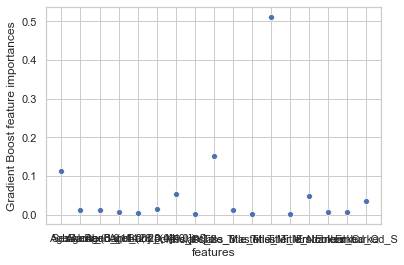

In [78]:
ax=sns.scatterplot(x='features',y='Gradient Boost feature importances',data=feature_dataframe)

In [79]:
feature_dataframe['mean'] = feature_dataframe.mean(axis= 1)
feature_dataframe.sort_values(by = 'mean', ascending = False, ignore_index = True).head()

,features,Gradient Boost feature importances,AdaBoost feature importances,Random Trees feature importances,Extra Trees feature importances,mean
0,Title_Mr,0.511604,0.064,0.216859,0.259717,0.263045
1,Sex,0.113299,0.332,0.189697,0.174847,0.202461
2,Title_Miss,0.001122,0.264,0.057871,0.060341,0.095833
3,Pclass_3,0.153031,0.006,0.109199,0.099068,0.091825
4,Title_Mrs,0.002139,0.210,0.076091,0.070869,0.089775


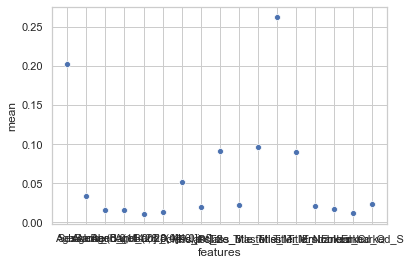

In [80]:
ax=sns.scatterplot(x='features',y='mean',data=feature_dataframe)

In [81]:
base_predictions_train = pd.DataFrame({'GradientBoost': gbc_oof_train.ravel(),
                                       'AdaBoost': ada_oof_train.ravel(),
                                       'RandomForest': rf_oof_train.ravel(),
                                       'ExtraTrees': et_oof_train.ravel()
                                      })
base_predictions_train.head()

,GradientBoost,AdaBoost,RandomForest,ExtraTrees
0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0
2,0.0,1.0,0.0,0.0
3,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0


In [82]:
#import plotly.offline as py
#py.init_notebook_mode(connected=True)
#import plotly.graph_objs as go
#import plotly.tools as tls

#data = [
#    go.Heatmap(
#        z= base_predictions_train.astype(float).corr().values ,
#        x=base_predictions_train.columns.values,
#        y= base_predictions_train.columns.values,
#          colorscale='Viridis',
#            showscale=True,
#            reversescale = True
#    )
#]
#py.iplot(data, filename='labelled-heatmap')

In [83]:
x_train = np.concatenate(( gbc_oof_train, svc_oof_train, ada_oof_train, rf_oof_train, et_oof_train), axis=1)
x_test = np.concatenate(( gbc_oof_test, svc_oof_test, ada_oof_test, rf_oof_test, et_oof_test), axis=1)

In [84]:
import xgboost as xgb

gbm = xgb.XGBClassifier(
    #learning_rate = 0.02,
 n_estimators= 2000,
 max_depth= 4,
 min_child_weight= 2,
 #gamma=1,
 gamma=0.9,                        
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1).fit(x_train, y_train)
predictions = gbm.predict(x_test)

In [86]:
# Generate Submission File 
StackingSubmission = pd.DataFrame({ 'PassengerId': df_test["PassengerId"],
                            'Survived': predictions })
StackingSubmission.to_csv("StackingSubmission.csv", index=False)

#submission = pd.DataFrame({
#       "PassengerId": df_test["PassengerId"],
#       "Survived": y_val
#   })
#
#print(submission.shape)
#submission.to_csv('titanic_svc.csv', index=False)

### 6.4 Hyperparameter tuning

Finally, we'll go with GradientBoostingClassifier, SVC, KNeighborsClassifier, DecisionTreeClassifier and ExtraTreesClassifier. We have to fine tune each algorithm before obtaining the predictions.

#### 6.4.1 GradientBoostingClassifier

In [ ]:
gbc_oof_train, gbc_oof_test = get_oof(gbc, x_train, y_train, x_test) # Extra Trees
svc_oof_train, svc_oof_test = get_oof(svc,x_train, y_train, x_test) # Random Forest
ada_oof_train, ada_oof_test = get_oof(ada, x_train, y_train, x_test) # AdaBoost 
rf_oof_train, rf_oof_test = get_oof(rf,x_train, y_train, x_test) # Gradient Boost
et_oof_train, et_oof_test = get_oof(et,x_train, y_train, x_test) # Support Vector Classifier

#### 6.4.2 SVC

#### 6.4.3 KNeighborsClassifier

#### 6.4.4 DecisionTreeClassifier

#### 6.4.5 ExtraTreesClassifier

### SVM

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
print('\n')

In [ ]:
clf_rbf = svm.SVC(kernel='rbf')
clf_rbf.fit(X_train, y_train) 
yhat = clf_rbf.predict(X_test)
mat=confusion_matrix(y_test, yhat)
sns.heatmap(mat.T, cmap=("Blues"), square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Not survived','Survived'],
            yticklabels=['Not survived','Survived'])
plt.xlabel('true label')
plt.ylabel('predicted label');
print(classification_report(y_test, yhat))

True or false indicated if the classifier predicted the class correctly. Positive or negative indicates if the classifier predicted the desired class.

In [ ]:
from sklearn.model_selection import learning_curve , ShuffleSplit
from plot_learning_curve import plot_learning_curve

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

title = r"Learning Curves (SVM, RBF kernel)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(clf_rbf, title, X, y, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=-1)

plt.show()

In [ ]:
print(f'Tuned SCV Accuracy: {round(accuracy_score(y_test, yhat), 2)}')

In [ ]:
X_val=validation
X_val=preprocessing.StandardScaler().fit(train).transform(X_val)
y_val=clf_rbf.predict(X_val)

#print(f'Tuned SCV Accuracy: {round(accuracy_score(y_test, y_val), 2)}')

In [ ]:
submission = pd.DataFrame({
       "PassengerId": df_test["PassengerId"],
       "Survived": y_val
   })

print(submission.shape)
submission.to_csv('titanic_svc.csv', index=False)

#kaggle competitions submit -c titanic -f titanic_svc_test.csv -m "Test of automatic submission"

### Optimized SVM

In [ ]:
C_val=[0.01, 0.05, 0.1, 0.5, 1, 10]

param_grid = [
    {'kernel': ['linear'], 'C': C_val},
    {'kernel': ['poly'], 'C': C_val, 'degree': [2, 3, 4, 5], 'gamma': ['scale', 'auto']},
    {'kernel': ['rbf'], 'C': C_val, 'gamma': ['scale', 'auto']},
    {'kernel': ['sigmoid'], 'C': C_val, 'gamma': ['scale', 'auto']}
    ]

#param_grid = [
#    {'kernel': ['poly'], 'C': [0.05, 0.1, 0.5, 1, 5], 'degree': [2, 3, 4]},
#    {'kernel': ['rbf'], 'C': [0.05, 0.1, 0.5, 1, 5]},
#    {'kernel': ['sigmoid'], 'C': [0.05, 0.1, 0.5, 1, 5]}
#    ]

#param_grid = [{'kernel': ['rbf'], 'C': [0.1, 0.5]}
#             ]

In [ ]:
svc = svm.SVC()
clf_svc_grid = GridSearchCV(svc, param_grid, cv=5)
best_model = clf_svc_grid.fit(X_train, y_train)

In [ ]:
##Print the value of best Hyperparameters
print('Best kernel:', best_model.best_estimator_.get_params()['kernel'])
print('Best C:', best_model.best_estimator_.get_params()['C'])
print('Best degree:', best_model.best_estimator_.get_params()['degree'])
print('Best gamma:', best_model.best_estimator_.get_params()['gamma'])
print('\n')

In [ ]:
title = r"Learning Curves (SVM, RBF kernel)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
plot_learning_curve(best_model, title, X, y, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=-1)

plt.show()

In [ ]:
y_pred = best_model.predict(X_test)
## df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
## print(df)
## print('\n')
print(f'Tuned SCV Accuracy: {round(accuracy_score(y_test, y_pred), 2)}')

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
param_grid = [
    {'criterion': ['gini'], 'n_estimators': [100], 'max_depth': list(np.arange(5,11)) + [None], 
     'min_samples_split': np.arange(2, 6), 'min_samples_leaf': np.arange(1, 6),
     'max_features': ['sqrt', 'log2', None], 'random_state': [4]},
    {'criterion': ['entropy'], 'n_estimators': [100], 'max_depth': list(np.arange(5,11)) + [None], 
     'min_samples_split': np.arange(2, 6), 'min_samples_leaf': np.arange(1, 6),
     'max_features': ['sqrt', 'log2', None], 'random_state': [4]}
    ] 

In [ ]:
rf = RandomForestClassifier()
clf_rf_grid = GridSearchCV(rf, param_grid, cv=5)
best_model = clf_rf_grid.fit(X_train, y_train)

In [ ]:
print('Criterion:', best_model.best_estimator_.get_params()['criterion'])
print('Number of estimators:', best_model.best_estimator_.get_params()['n_estimators'])
print('Max depth:', best_model.best_estimator_.get_params()['max_depth'])
print('Min samples split:', best_model.best_estimator_.get_params()['min_samples_split'])
print('Min samples leaf:', best_model.best_estimator_.get_params()['min_samples_leaf'])
print('Max features:', best_model.best_estimator_.get_params()['max_features'])

In [ ]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Accuracy: {round(accuracy, 2)}')

In [ ]:
validation.head()

In [ ]:
X_val = validation
X_val=preprocessing.StandardScaler().fit(train).transform(X_val)
y_val=best_model.predict(X_val)

In [ ]:
submission = pd.DataFrame({
       "PassengerId": df_test["PassengerId"],
       "Survived": y_val
   })
submission.to_csv('titanic_RF_best.csv', index=False)

In [ ]:
#rf_best_hand = RandomForestClassifier(criterion='entropy', n_estimators=100, max_depth=None, min_samples_split=4, 
                                 #min_samples_leaf=3, max_features=None, random_state=4)

title = r"Random Forest Classifier"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(best_model, title, X, y, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=-1)
#plot_learning_curve(rf_best_hand, title, X, y, ylim=(0.7, 1.01),
#                    cv=cv, n_jobs=-1)

plt.show()

To do:

- Hacer seleccion de algoritmos (sin XGBoost)
- Optimizar esos algoritmos
- Usar esos algoritmos para dar predicciones
- Feed predicciones a XGBoost (stacking)

In [ ]:
# Importing necessary modules for training and evaluation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Data preprocessing and splitting
scaler = StandardScaler()
X = scaler.fit_transform(train)
y = target

#Number of K folds
n_kfolds=10

# Number of estimators for tree-based ensembles
num_estimators = 100

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
#print ('Train set:', X_train.shape,  y_train.shape)
#print ('Test set:', X_test.shape,  y_test.shape)

# Calculating score for a bunch of algortihms
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
import xgboost as xgb

rand_state=SEED

models = [LogisticRegression(
             random_state=rand_state),
          Perceptron(
              random_state=rand_state), 
          SGDClassifier(
              random_state=rand_state), 
          SVC(
              random_state=rand_state), 
          KNeighborsClassifier(
              ), 
          GaussianNB(
              ),
          DecisionTreeClassifier(
              random_state=rand_state), 
          RandomForestClassifier(
              random_state=rand_state,
              n_estimators=num_estimators),
          ExtraTreesClassifier(
              random_state=rand_state,
              n_estimators=num_estimators),
          AdaBoostClassifier(
              random_state=rand_state,
              n_estimators=num_estimators),
          GradientBoostingClassifier(
              random_state=rand_state, 
              n_estimators=num_estimators)
         ]

model_name = []
acc_test = []
acc_train = []
cv_scores = []

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_name.append(model.__class__.__name__)
    acc_test.append(model.score(X_test, y_test))
    acc_train.append(model.score(X_train, y_train))
    cv_scores.append(cross_val_score(model, X, y, cv=5))

results = pd.DataFrame({
    'Model': model_name,
    'CvScore' : cv_scores,
    'TestScore': acc_test,
    'TrainScore': acc_train
    })


results.insert(1, 'CVMeanScore', np.mean(results['CvScore'].tolist(), axis=1))
results.drop(['CvScore'],axis=1,inplace=True)

#by='TestScore'
results.sort_values(by='CVMeanScore', ascending=False, ignore_index=True, inplace=True)
#print(results)

print('The five best ML models for this problem are:\n') 
print(results.iloc[:5,0:2])

<a id='Evaluation'></a>
## 7. Evaluation

<a id='Conclusion'></a>
## 8. Conclusion